# Module 3: Ciphers
---
## Introduction
In this module, we will revisit some of the ciphers we saw in module 1. However, now armed with CUDA, we'll see how we can parallelize our programs to make them even faster.

Before moving on, please watch lecture videos Parts 1 - 3 to complete this section. 

This assignment will cover:

* Parallelizing the Caesar Cipher
* The Affine Cipher
---
## Materials
* Lecture Videos
    * [Part 1](https://drive.google.com/file/d/1q4Hi9dKXhtOD0rDh3VvzoUn2OhqHXGJ-/view)
    * [Part 2](https://drive.google.com/file/d/14F1MAbD69esFYLT2dIYDniVKex9ol4U7/view?usp=sharing)
    * [Part 3](https://drive.google.com/file/d/1N8Ps0L7tL1B2sJx9XMHuw9H_CQMdCxLX/view?usp=sharing)
    * Optional material: [Part 4](https://drive.google.com/file/d/1vqdP4SEswH5gVIZ2J2Qo8rhRN04gCEx8/view?usp=sharing)
* [Slides](https://docs.google.com/presentation/d/1SsCLm-Z3ZxQJ9F3DFjk0OKpBNGyDcVNThvxqIELRmic/edit?usp=sharing)
---
## Assignment
There are two parts to this assignment:

* Part 1 -- The Caesar Cipher Revisited
* Part 2 -- The Affine Cipher
---
## Module Learning Objectives
* Recognize types of practical problems that can be parallelized using CUDA
* Understand how many threads are needed to solve a given problem
* Write kernels that decode messages (using brute force and a formula)

Before you dive in to Module 4, we need to:  
* Install our CUDA plugin and load it into Colab
* Figure out the correct compute capability for our GPU

Run the following cells:

In [ ]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

In [ ]:
%load_ext nvcc_plugin

In [ ]:
!nvidia-smi

| GPU      | Compute Capability | `-arch flag` |
| :-----------: | :-----------: | :-----------: |
| Tesla K80 | 3.7 | `-arch=sm_37` |
| NVIDIA T4 | 7.5 | `-arch=sm_75`   |
| NVIDIA P4 | 6.1 | `-arch=sm_61` |
| NVIDIA P100 | 6.0 | `-arch=sm_60`|

**Be sure to note down your compute capability for your GPU!**

Cool! Now that we have that out of the way, onwards with Module 3!

## Part 1: The Caesar Cipher Revisited

### Introduction

In Part 2 of Module 1, we cracked some ciphertext encrypted using the Caesar Cipher by brute-forcing all possible combinations of the key, k. We are now going to revisit that same idea, but this time we will parallelize our implementation using CUDA.

### Parallelization idea


Previously, we had to have two nested `for` loops in `caesar.c`. The outer for loop tried all possible values of the key while the inner for loop iterated through each character in our ciphertext. This time, we'll launch `N` separate threads--each thread will be responsible for trying a value of `k`. As soon as each thread has finished, we write its output to a buffer, and continue.

> What should the value of `N` be? (e.g., how many threads should we launch?)\
**TODO: Your answer here**

Some starter code has been provided for you:

In [ ]:
%%cuda --name caesar.cu

/*
 * caesar.cu 
 * 
 * Decrypts a message encrypted with the Caesar cipher.
 */

#include <stdlib.h>
#include <string.h>

/* Number of threads to spawn */
#define N /*...TODO ...*/

/* Decrypts the ciphertext using brute-force */
__global__ void caesar_decrypt(char* msg, char* msg_output) {
    /* Include a bounds check here so we don't access 
       elements outside of N */

    /* Each thread that we spawn tries a value of k */
    ...
    /* Logic for decrypting Caesar Shift */
    ...
    /* As soon as each thread finishes its work, it
       writes to a unique section of msg_output */
    ...
}

int main() {
    char msg[] = "kvoh wg hvs qodwhoz ct oggmfwo";

    /* Allocate memory on the GPU, copy it over,
       and call your kernel. */
    ...
    /* Display the contents of msg_output */
    ...
    /* Don't forget to free host and device memory when done! */
    ...
}

### Tasks

* Implement `caesar.cu`, defining a constant N which represents the number of threads to spawn in your program.
* Finish implementing the `caesar_decrypt` kernel call. Spawn a single block of N threads.
* Output each individual try for **k** to the console. For example:
    * ```txt
        dahhkTpdana
        czggjSoczmz
        byffiRnbyly
        ...
      ```

* >What did the message decrypt to?\
    **TODO: Your answer here**

## Part 2: The Affine Cipher

### Introduction

As we wrap up our study of ciphers and CUDA, we will decrypt a message encrypted with the Affine cipher. Like the Caesar-shift, the Affine is also a monoalphabetic substitution cipher. However, each alphabet is now encrypted and decrypted using the respective mathematical function:

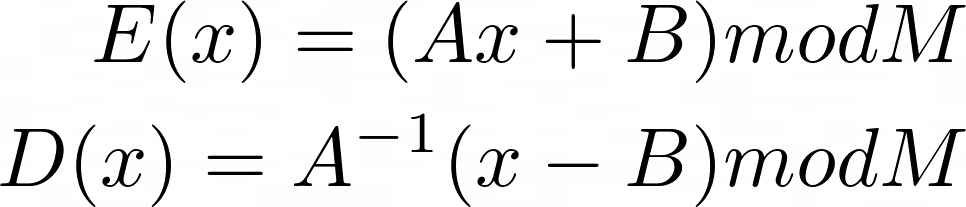

### Parallelization idea

We first need to identify how multiple threads can help us solve this problem. Ideally, since we have our decryption function D(x), we should be able to operate on each letter individually.

> How many threads should we spawn to decrypt a message of length m? How is this different from our previous approach with the Caesar cipher?\
**TODO: Your answer here**

You tasks is to implement affine.cu. Name your kernel `affine_decrypt`, and use the following values when writing the logic for D(x).
```
A = 5
B = 9
A_MMI_M = 21 (Modular Multiplicative Inverse)
M = ?
```

> What should the value of M be? Look to see the types of characters in msg.\
**TODO: Your answer here**

Define these as constants in your program. Spawn a single block with the appropriate number of threads.

Some starter code for `affine.cu` has been provided for you.

In [ ]:
%%cuda --name affine.cu

#include <stdio.h>
#include <stdlib.h>

#define N /* ... TODO ... */

/* modulo function that works with negative numbers */
int modulo(int a, int b) {
    int r = a % b;
    if (r < 0) { return r + b; }
    return r;
}

__global__ void affine_decrypt(char* msg, char* msg_output) {
    /* Include bounds check here */
        ...
    /* Work on a separate portion of msg each time */
        ...
    /* Logic for decrypting Affine */
        ...
    /* As each thread finishes its work, it
       writes to a unique section of msg_output */
        ...
}

__global__ void affine_decrypt_block(char* msg, char* msg_output) {
    /* ... TODO ... */
}

int main() {
    char msg[] = "orizwuzrciwpufccxjclaswzyahivevlixcvuoillao";
    /* Allocate memory on the GPU, copy it over,
       and call your kernel. *
        ...
    /* Display the contents of msg_output*/
        ...
    /* Free host and device memory when done */
        ...
}

### Varying the Number of Blocks


Define another kernel, this time called `affine_decrypt_block`. Note that you now need to change the way you find each thread's ID. Once implemented, spawn `N` blocks, each with a single thread.

### Hints

As a first step, you should obtain the position in the normal alphabet of each letter in `msg`. This value is represented by `x` in `D(x)`. `char` to `int` conversions would be helpful for this purpose.

### Tasks

* Finish implementing `affine.cu`:
    * Implement the `affine_decrypt` kernel call
    * Implement the `affine_decrypt_block1` kernel call
* Output each individual try for **k** to the console. For example:
    * ```txt
        dahhkTpdana
        czggjSoczmz
        byffiRnbyly
        ...
      ```
* >What did the message decrypt to?\
    **TODO: Your answer here**

## All Done?
Navigate to `File` > `Download` > `Download .ipynb`. You can later submit this `.ipynb` file as an attachment after running each of your cells in the [Course Feedback survey](https://docs.google.com/forms/d/e/1FAIpQLSfAYjrJ04aurqE96z-OdUVWsLwdlq14oPKBUJRkShzfZtn6Gg/viewform).